# 준비

In [1]:
# 필요 library import 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# 패키지 임포트
import os
import warnings

# FutureWarning 제거
warnings.simplefilter(action='ignore', category = FutureWarning)

# os 에 따른 Font 깨짐 제거를 위해 Font 지정
import os
if os.name == 'nt' :
    font_family = "Malgun Gothic"
else :
    font_family = "Apple Gothic"
    

# -값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font = font_family, rc = {"axes.unicode_minus" : False})

In [22]:
data = pd.read_csv('total_dataset.csv', encoding='euc-kr', index_col=['EMD_NM'])

# 데이터 확인

In [3]:
data

,TRAD,CONCERT,OLD,MART,LIB,ART,MUS,MED,COMM,SPORT,OWN,JOB,CARROT,CHARGE
EMD_NM,,,,,,,,,,,,,,
연제동,0,0,0,0,3,0,0,0,0,3,0,0,2,0
운암동,1,2,1,0,13,1,0,13,3,3,6,135,3,3
덕림동,0,0,1,0,0,0,0,0,0,1,0,0,0,1
삼거동,0,0,3,0,0,0,0,3,0,1,0,0,0,0
북구_동림동,0,0,1,0,6,0,0,3,1,6,6,27,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
쌍촌동,0,3,1,0,14,0,0,8,2,10,41,256,3,5
내방동,0,0,0,0,1,0,0,0,0,1,0,0,0,1
덕흥동,0,0,1,0,0,0,0,0,0,5,0,0,0,0


In [4]:
data.head()

,TRAD,CONCERT,OLD,MART,LIB,ART,MUS,MED,COMM,SPORT,OWN,JOB,CARROT,CHARGE
EMD_NM,,,,,,,,,,,,,,
연제동,0,0,0,0,3,0,0,0,0,3,0,0,2,0
운암동,1,2,1,0,13,1,0,13,3,3,6,135,3,3
덕림동,0,0,1,0,0,0,0,0,0,1,0,0,0,1
삼거동,0,0,3,0,0,0,0,3,0,1,0,0,0,0
북구_동림동,0,0,1,0,6,0,0,3,1,6,6,27,2,3


In [5]:
data.describe()

,TRAD,CONCERT,OLD,MART,LIB,ART,MUS,MED,COMM,SPORT,OWN,JOB,CARROT,CHARGE
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,0.119171,0.113990,0.492228,0.113990,1.818653,0.088083,0.041451,1.378238,0.502591,2.865285,3.497409,30.896373,0.383420,0.575130
std,0.434568,0.417659,0.823605,0.429948,3.367007,0.405063,0.199849,2.581372,0.791388,4.089174,11.208314,74.808990,0.900309,1.097252
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,2.000000,1.000000,3.000000,2.000000,26.000000,0.000000,1.000000
max,3.000000,3.000000,4.000000,3.000000,16.000000,4.000000,1.000000,18.000000,4.000000,20.000000,102.000000,553.000000,5.000000,5.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 연제동 to 충장동
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   TRAD     193 non-null    int64
 1   CONCERT  193 non-null    int64
 2   OLD      193 non-null    int64
 3   MART     193 non-null    int64
 4   LIB      193 non-null    int64
 5   ART      193 non-null    int64
 6   MUS      193 non-null    int64
 7   MED      193 non-null    int64
 8   COMM     193 non-null    int64
 9   SPORT    193 non-null    int64
 10  OWN      193 non-null    int64
 11  JOB      193 non-null    int64
 12  CARROT   193 non-null    int64
 13  CHARGE   193 non-null    int64
dtypes: int64(14)
memory usage: 22.6+ KB


In [7]:
data.isnull()

,TRAD,CONCERT,OLD,MART,LIB,ART,MUS,MED,COMM,SPORT,OWN,JOB,CARROT,CHARGE
EMD_NM,,,,,,,,,,,,,,
연제동,False,False,False,False,False,False,False,False,False,False,False,False,False,False
운암동,False,False,False,False,False,False,False,False,False,False,False,False,False,False
덕림동,False,False,False,False,False,False,False,False,False,False,False,False,False,False
삼거동,False,False,False,False,False,False,False,False,False,False,False,False,False,False
북구_동림동,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
쌍촌동,False,False,False,False,False,False,False,False,False,False,False,False,False,False
내방동,False,False,False,False,False,False,False,False,False,False,False,False,False,False
덕흥동,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isnull().sum()

TRAD       0
CONCERT    0
OLD        0
MART       0
LIB        0
ART        0
MUS        0
MED        0
COMM       0
SPORT      0
OWN        0
JOB        0
CARROT     0
CHARGE     0
dtype: int64

# 독립변수, 종속변수 선언

In [23]:
# 독립변수 ( data )
X = data.iloc[:, :-1]

In [24]:
# 종속변수 ( target )
y = data.iloc[:,-1]

In [5]:
print(f'X row : {X.shape[0]}개')
print(f'y row : {y.shape[0]}개')

X row : 193개
y row : 193개


KeyboardInterrupt: 

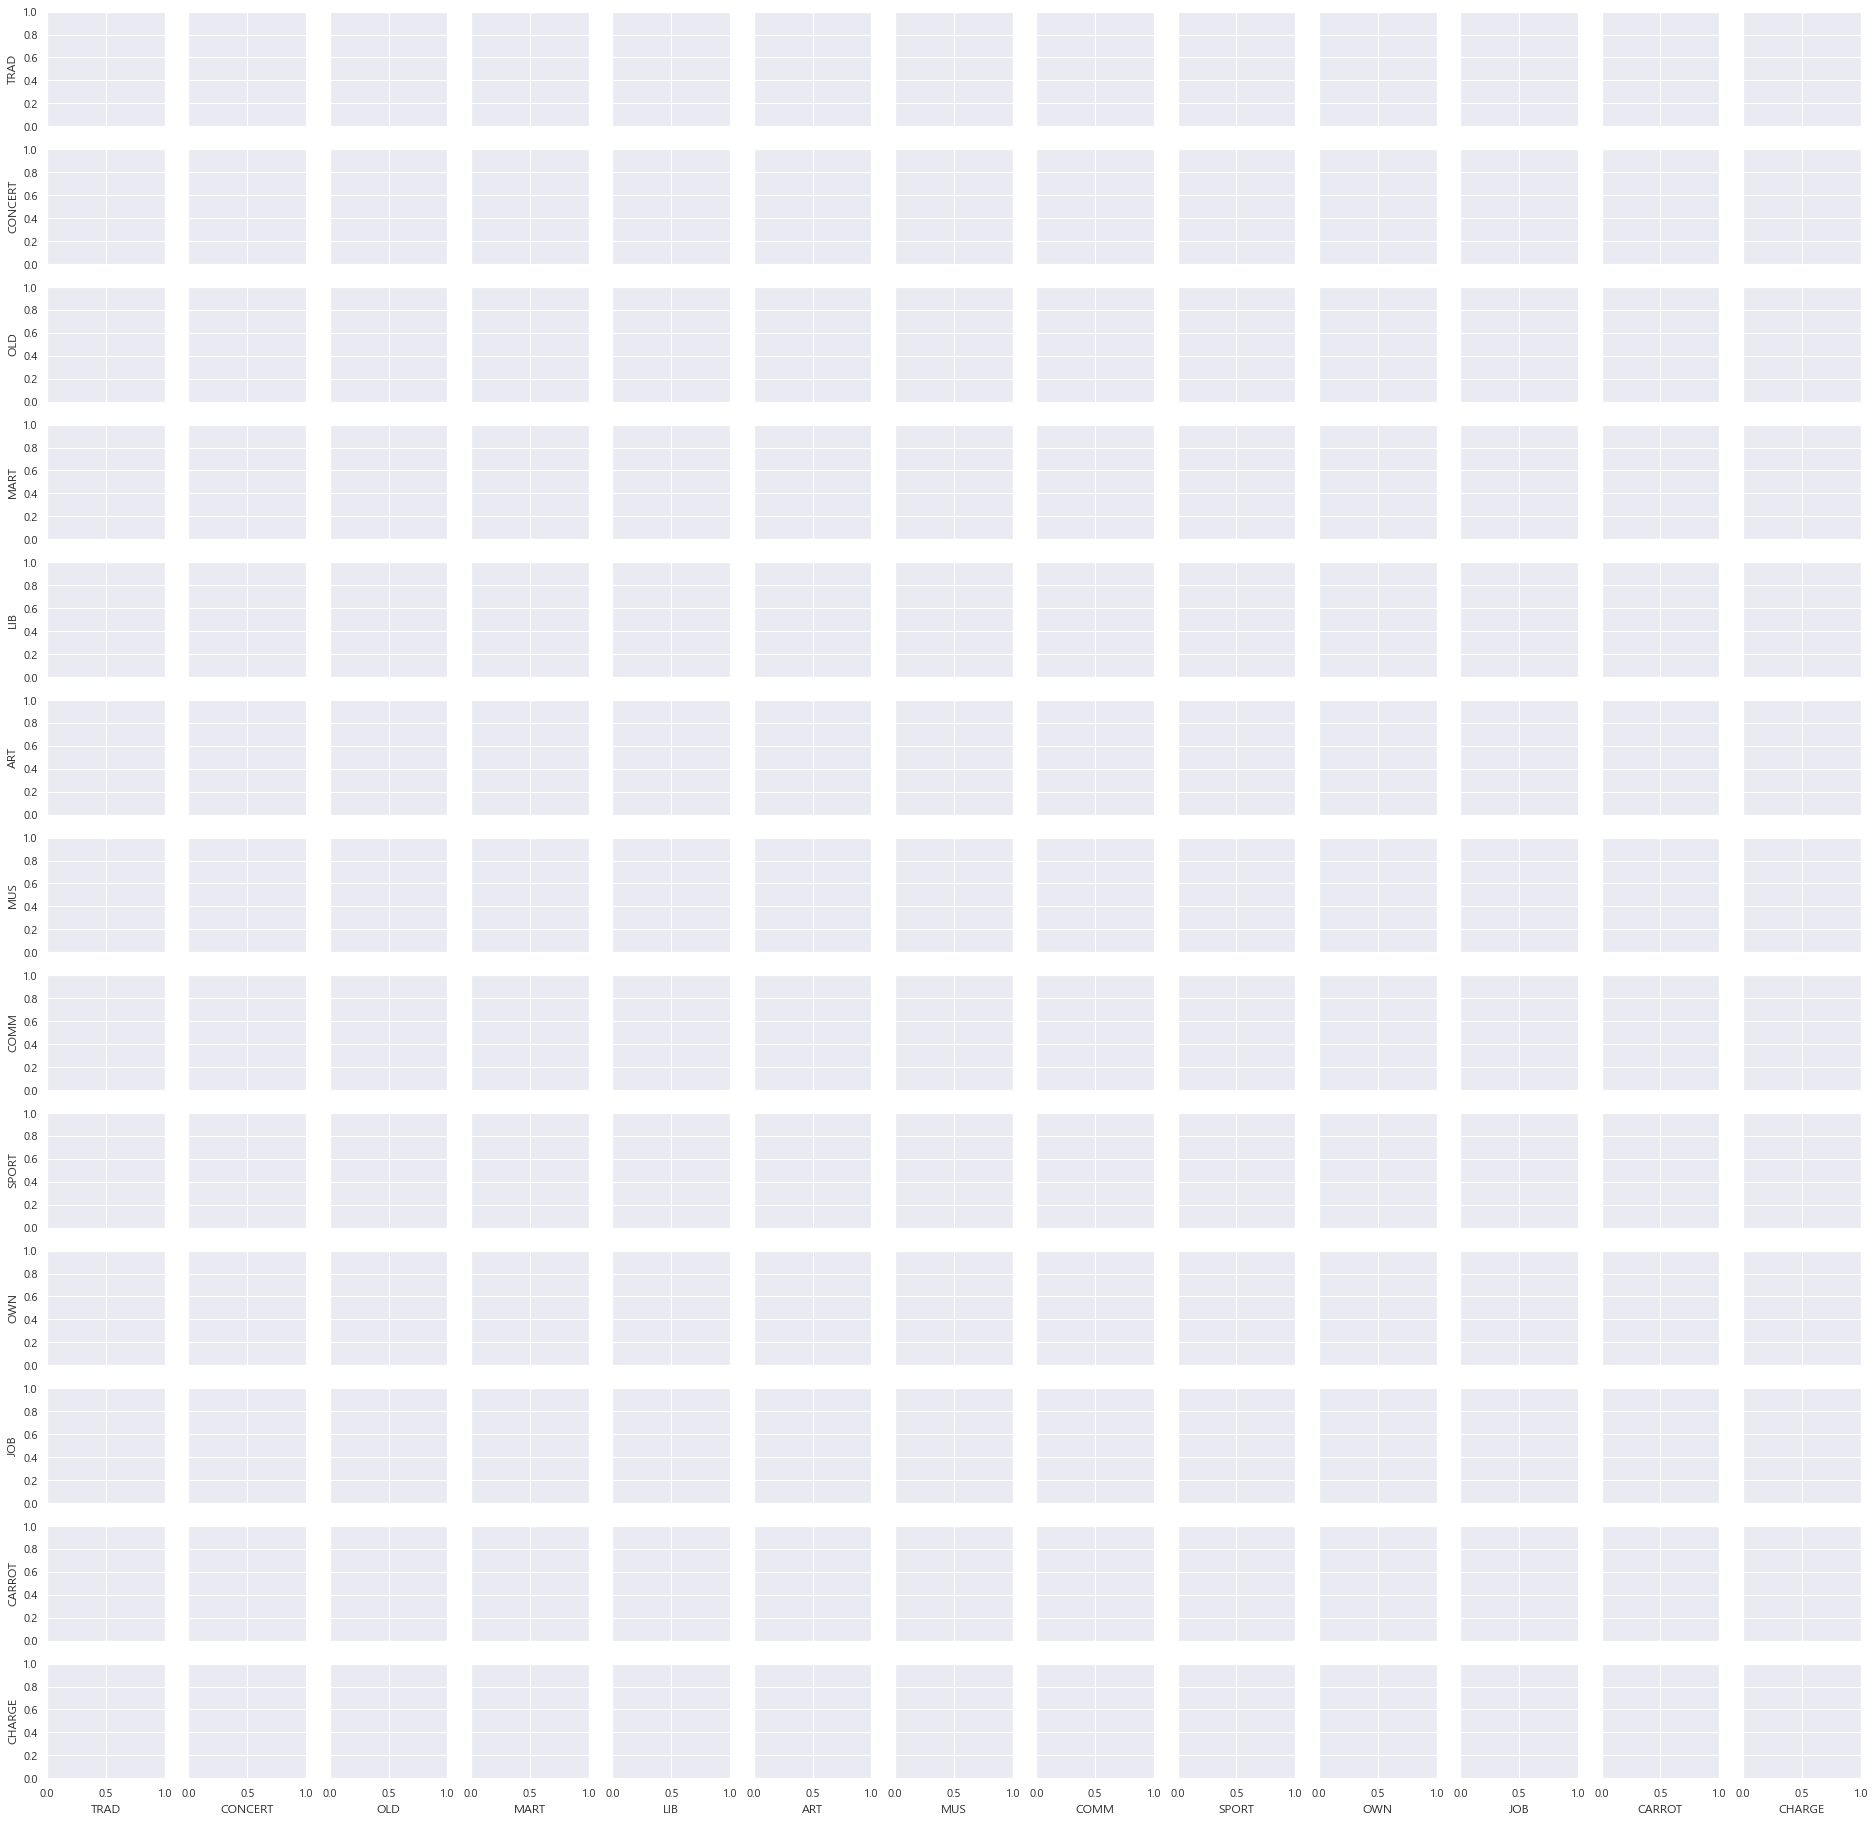

In [55]:
# 상관계수 그래프
sns.pairplot(data.corr())

## train, test split

In [25]:
# 훈련, 테스트 데이터 분리 - 원본 데이터
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## VIF 높은 컬럼 제거하고 선언 ( 때에 따라 바꿔가며 진행 )

In [13]:
data = data.drop(['MUS', 'COMM', 'CARROT'], axis=1)

In [14]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [15]:
# 훈련, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 표준화
## Strandard Scaler

In [76]:
# Standard Scaler  ( 표준화 )
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std_data = std.fit_transform(data.iloc[:, :])

In [77]:
# 표준화된 행렬 -> 데이터프레임 변환 
scaled_df = pd.DataFrame(std_data, columns=[data.columns])

In [78]:
# 독립변수 ( data )
X = scaled_df.iloc[:,:10]

In [79]:
# 종속변수 ( target )
y = scaled_df.iloc[:,-1]

In [80]:
# 흔련, 테스트 데이터 분리 - Scaled Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=369, stratify=y)

## Min-Max Scaler

In [91]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [92]:
# 표준화된 행렬 -> 데이터프레임 변환 
scaled_df = pd.DataFrame(scaled_data, columns=[data.columns])

In [93]:
# 독립변수 ( data )
X = scaled_df.iloc[:,:-1]

In [94]:
# 종속변수 ( target )
y = scaled_df.iloc[:,-1]

In [95]:
# 흔련, 테스트 데이터 분리 - Scaled Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=369, stratify=y)

# 다중공선성 확인

In [7]:
from statsmodels import api
ols = api.OLS(y, X)
result = ols.fit()

In [8]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                 CHARGE   R-squared (uncentered):                   0.760
Model:                            OLS   Adj. R-squared (uncentered):              0.746
Method:                 Least Squares   F-statistic:                              57.79
Date:                Wed, 17 Aug 2022   Prob (F-statistic):                    2.58e-51
Time:                        03:59:25   Log-Likelihood:                         -177.28
No. Observations:                 193   AIC:                                      374.6
Df Residuals:                     183   BIC:                                      407.2
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## VIF ( Variance Inflation Factors ) 확인

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
def feature_engineering_XbyVIF(X):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(X.values, i)
                         for i in range(X.shape[1])]
    vif['Feature'] = X.columns
    return vif

In [31]:
vif = feature_engineering_XbyVIF(X)

In [32]:
print(vif)

    VIF_Factor     Feature
0     1.827092     (TRAD,)
1     1.618133  (CONCERT,)
2     1.653440      (OLD,)
3     1.473029     (MART,)
4     3.656890      (LIB,)
5     1.128756      (ART,)
6     1.262073      (MUS,)
7     4.120794     (COMM,)
8     1.714413    (SPORT,)
9     1.984134      (OWN,)
10    1.757838      (JOB,)
11    2.192056   (CARROT,)


- VIF 가 4이상인 경우, 다중공선성이 존재한다고 판단, 변수 제거

# 모델 학습
## Multi-regression

In [26]:
model = LinearRegression()

In [27]:
model.fit(X_train, y_train)

LinearRegression()

In [28]:
print(f'훈련 세트의 정확도 : {model.score(X_train, y_train)}')
print(f'테스트 세트의 정확도 : {model.score(X_test, y_test)}')
print(f'사용한 특성의 수 : {np.sum(model.coef_ != 0)}')

훈련 세트의 정확도 : 0.6860575880300621
테스트 세트의 정확도 : 0.7171574232060246
사용한 특성의 수 : 13


In [36]:
model_pred = model.predict(X_test)

In [37]:
residual = y_test - model_pred

In [38]:
print(f'잔차 평균 : {np.mean(residual)}')

잔차 평균 : -0.012467962422250765


In [39]:
residual.describe

<bound method NDFrame.describe of 183   -0.027395
80     0.110113
20    -0.110844
94    -0.021549
110   -0.037904
146   -0.330665
79    -0.200440
101   -0.021549
133   -0.017557
177   -0.007572
24     0.167696
163   -0.137165
27     0.002547
76    -0.037904
173   -0.019072
83    -0.029727
90     0.087793
137   -0.118068
78    -0.192213
161    0.016421
36     0.242093
37    -0.050268
145    0.002547
168   -0.005194
175   -0.005194
41     0.037986
77     0.246871
38    -0.021549
51    -0.013372
19     0.072581
65     0.000066
140   -0.005194
96    -0.013372
86     0.251404
42    -0.013372
112   -0.013372
31    -0.017557
26    -0.005194
100   -0.251105
Name: (CHARGE,), dtype: float64>

### 다중선형회귀로 수요 분석

In [40]:
# 기설치 충전소 개수와 분석 결과로 획득한 수요 개수의 차이 비교
true_demand = pd.DataFrame({'수요 분석 결과' : model.predict(X),
              '기설치 충전소 개수' : y,
              '결과 수요 개수' : model.predict(X) - y})

In [41]:
true_demand_list = true_demand[true_demand['결과 수요 개수'] >= 0.5].sort_values(by='결과 수요 개수')
print(f'분석 결과 충전소 수요 개수 : {len(true_demand_list)}개')

분석 결과 충전소 수요 개수 : 0개


#### CHARGE 0개 대상 분석

In [42]:
# CHARGE가 0개인 X_test 생성
X_test_charge0 = data[data['CHARGE'] == 0].iloc[:, :-1]

In [43]:
# 생성한 test data 예측 결과 저장
y_pred_charge0 = model.predict(X_test_charge0)

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [44]:
# 동이름만 가져와서 합친 데이터프레임 생성
## 예측 결과 -> charge_demand 컬럼의 df 생성
y_pred_charge0_df = pd.DataFrame(y_pred_charge0, columns=['charge_demand'])

## charge가 0인 동이름 가져와서 df 생성 
addr_charge0 = pd.DataFrame(X_test_charge0.index.values, columns=['동이름'])

# 동이름과 charge_demand가 합쳐진 df 생성
merged_charge0_df = pd.concat([addr_charge0, y_pred_charge0_df], axis=1).set_index('동이름')

In [45]:
# charge_demand가 0.7 이상인 row만 조회, 높은 것부터 조회
demand_df_charge0 = merged_charge0_df[merged_charge0_df['charge_demand'] > 0.7].sort_values(by='charge_demand', ascending=False)

In [46]:
demand_df_charge0

,charge_demand
동이름,
옥동,98.344533
소촌동,94.676143
서창동,68.180437
임암동,56.472850
광천동,44.500692
북동,36.285386
서동,35.425811
신창동,26.741150
백운동,23.625330


In [47]:
print(f'수요 지수가 0.7 이상인 동 : {len(demand_df_charge0)}')

수요 지수가 0.7 이상인 동 : 35


In [48]:
# demand_df의 인덱스 값이 저장된 리스트 생성
demand_list_charge0 = demand_df_charge0.index.values

In [49]:
# concat용 빈 DF 생성
merged_df_charge0 = pd.DataFrame()

In [100]:
# 빈 DF에 동이름이 demand_list와 같은 ( charge_demand가 0.7 이상인 ) 데이터들로 이루어진 DF 생성
for i in range(len(demand_list_charge0)):
    merged_df_charge0 = pd.concat([merged_df_charge0, data.reset_index()[data.reset_index()['EMD_NM'] == demand_list_charge0[i]]], axis=0)

In [102]:
# CHARGE 0개 대상 분석 결과 DF 생성
## demand_df가 저장하고 있는 model.predict 값이 실수이므로, merged_df의 dtype을 float64로 변경해야함
mlr_charge0_final = pd.concat([merged_df_charge0.set_index('EMD_NM').astype('float64'), demand_df_charge0], axis=1)

In [103]:
mlr_charge0_final

,TRAD,CONCERT,OLD,MART,LIB,ART,MUS,MED,COMM,SPORT,OWN,JOB,CARROT,CHARGE,charge_demand
옥동,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,210.0,1.0,0.0,98.344533
소촌동,0.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,15.0,5.0,197.0,1.0,0.0,94.676143
서창동,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,145.0,0.0,0.0,68.180437
임암동,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,119.0,0.0,0.0,56.472850
광천동,0.0,0.0,1.0,1.0,3.0,0.0,0.0,4.0,1.0,2.0,3.0,93.0,3.0,0.0,44.500692
북동,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.0,0.0,0.0,36.285386
서동,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,3.0,75.0,0.0,0.0,35.425811
신창동,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,1.0,19.0,3.0,50.0,2.0,0.0,26.741150
백운동,0.0,0.0,0.0,0.0,7.0,0.0,0.0,6.0,2.0,0.0,7.0,45.0,2.0,0.0,23.625330
동구_지산동,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,2.0,10.0,2.0,38.0,0.0,0.0,20.715237


#### CHARGE 1개 대상 분석

In [ ]:
# CHARGE가 1개인 X_test 생성
X_test_charge1 = data[data['CHARGE'] == 1].iloc[:, :-1]

In [ ]:
# 생성한 test data 예측 결과 저장
y_pred_charge1 = model.predict(X_test_charge1)

In [ ]:
# 동이름만 가져와서 합친 데이터프레임 생성
## 예측 결과 -> charge_demand 컬럼의 df 생성
y_pred_charge1_df = pd.DataFrame(y_pred_charge1, columns=['charge_demand'])

## charge가 0인 동이름 가져와서 df 생성 
addr_charge1 = pd.DataFrame(X_test_charge1.index.values, columns=['동이름'])

# 동이름과 charge_demand가 합쳐진 df 생성
merged_charge1_df = pd.concat([addr_charge1, y_pred_charge1_df], axis=1).set_index('동이름')

In [ ]:
# charge_demand가 1 이상인 row만 조회, 높은 것부터 조회
demand_df_charge1 = merged_charge1_df[merged_charge1_df['charge_demand'] > 1].sort_values(by='charge_demand', ascending=False)

In [ ]:
demand_df_charge1

In [ ]:
print(f'수요 지수가 1 이상인 동 : {len(demand_df_charge1)}')

In [ ]:
# demand_df의 인덱스 값이 저장된 리스트 생성
demand_list_charge1 = demand_df_charge1.index.values

In [ ]:
# concat용 빈 DF 생성
merged_df_charge1 = pd.DataFrame()

In [ ]:
# 빈 DF에 동이름이 demand_list와 같은 ( charge_demand가 0.7 이상인 ) 데이터들로 이루어진 DF 생성
for i in range(len(demand_list_charge1)):
    merged_df_charge1 = pd.concat([merged_df_charge1, data.reset_index()[data.reset_index()['EMD_NM'] == demand_list_charge1[i]]], axis=0)

In [ ]:
# CHARGE 0개 대상 분석 결과 DF 생성
## demand_df가 저장하고 있는 model.predict 값이 실수이므로, merged_df의 dtype을 float64로 변경해야함
mlr_charge1_final = pd.concat([merged_df_charge1.set_index('EMD_NM').astype('float64'), demand_df_charge1], axis=1)

In [ ]:
mlr_charge1_final

In [ ]:
charge_true = mlr_charge1_final['charge_demand'] - mlr_charge1_final['CHARGE']

In [ ]:
charge_true

#### CHARGE 2개 대상 분석

In [ ]:
# CHARGE가 2개인 X_test 생성
X_test_charge2 = data[data['CHARGE'] == 2].iloc[:, :-1]

In [ ]:
# 생성한 test data 예측 결과 저장
y_pred_charge2 = model.predict(X_test_charge2)

In [ ]:
# 동이름만 가져와서 합친 데이터프레임 생성
## 예측 결과 -> charge_demand 컬럼의 df 생성
y_pred_charge2_df = pd.DataFrame(y_pred_charge2, columns=['charge_demand'])

## charge가 2인 동이름 가져와서 df 생성 
addr_charge2 = pd.DataFrame(X_test_charge2.index.values, columns=['동이름'])

# 동이름과 charge_demand가 합쳐진 df 생성
merged_charge2_df = pd.concat([addr_charge2, y_pred_charge2_df], axis=1).set_index('동이름')

In [ ]:
# charge_demand가 2 이상인 row만 조회, 높은 것부터 조회
demand_df_charge2 = merged_charge2_df[merged_charge2_df['charge_demand'] > 2].sort_values(by='charge_demand', ascending=False)

In [ ]:
demand_df_charge2

In [ ]:
print(f'수요 지수가 2 이상인 동 : {len(demand_df_charge2)}')

In [ ]:
# demand_df의 인덱스 값이 저장된 리스트 생성
demand_list_charge0 = demand_df_charge0.index.values

In [ ]:
# concat용 빈 DF 생성
merged_df_charge0 = pd.DataFrame()

In [ ]:
# 빈 DF에 동이름이 demand_list와 같은 ( charge_demand가 0.7 이상인 ) 데이터들로 이루어진 DF 생성
for i in range(len(demand_list_charge0)):
    merged_df_charge0 = pd.concat([merged_df_charge0, data.reset_index()[data.reset_index()['EMD_NM'] == demand_list[i]]], axis=0)

In [ ]:
# CHARGE 0개 대상 분석 결과 DF 생성
## demand_df가 저장하고 있는 model.predict 값이 실수이므로, merged_df의 dtype을 float64로 변경해야함
mlr_charge0_final = pd.concat([merged_df_charge0.set_index('EMD_NM').astype('float64'), demand_df], axis=1)

In [ ]:
mlr_charge0_final

## Lasso

In [ ]:
lasso = Lasso(alpha=0.5).fit(X_train, y_train)

In [ ]:
print(f'훈련 세트의 정확도 : {lasso.score(X_train, y_train)}')
print(f'테스트 세트의 정확도 : {lasso.score(X_test, y_test)}')
print("사용한 특성의 수 : {}".format(np.sum(lasso.coef_ != 0)))
print("사용한 max_iter : {}".format(lasso.n_iter_))

In [ ]:
lasso.coef_

In [ ]:
lasso_pred = lasso.predict(X_test)

In [ ]:
lasso_residual = y_test - lasso_pred

In [ ]:
print(f'잔차 평균 : {np.mean(lasso_residual)}')

## Ridge

In [33]:
ridge = Ridge(random_state=142).fit(X_train, y_train)

In [20]:
ridge.coef_

array([ 0.77030008,  0.16383573, -0.09731176, -0.12162505,  0.05069923,
        0.19593373,  0.09770522,  0.05877836,  0.00777667,  0.00397072])

In [34]:
print(f'훈련 세트의 정확도 : {ridge.score(X_train, y_train)}')
print(f'테스트 세트의 정확도 : {ridge.score(X_test, y_test)}')
print("사용한 특성의 수 : {}".format(np.sum(ridge.coef_ != 0)))
print("사용한 max_iter : {}".format(ridge.n_iter_))

훈련 세트의 정확도 : 0.6857155245884121
테스트 세트의 정확도 : 0.7227126495574061
사용한 특성의 수 : 13
사용한 max_iter : None


In [16]:
# 예측 데이터 도출
ridge_pred = ridge.predict(X_test)

In [20]:
# 타겟 데이터와 예측 데이터 사이의 잔차 계산
ridge_residual = y_test - ridge_pred

In [21]:
print(f'잔차 평균 : {np.mean(ridge_residual)}')

잔차 평균 : -0.07957475434300566


In [22]:
# R2 제곱 ( = 정확도, 결정계수 )
from sklearn.metrics import r2_score
r2_score(y_test, ridge_pred, sample_weight=None, multioutput='uniform_average')

0.7204045957118465

## Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet

EN = ElasticNet(alpha=0.5)
EN.fit(X_train, y_train)

In [ ]:
print(f'train data의 정확도 : {EN.score(X_train, y_train)}')
print(f'test data의 정확도 : {EN.score(X_test, y_test)}')
print(f'ElasticNet의 정확도 : {EN.score(X, y)}')

## 그 외 회귀모델
### GradientBoostingRegressor ( Ensemble )

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor(random_state=42, n_estimators=50)
gbm.fit(X_train, y_train)

In [ ]:
print(f'훈련 세트의 정확도 : {gbm.score(X_train, y_train)}')
print(f'테스트 세트의 정확도 : {gbm.score(X_test, y_test)}')
print(f'GBR R2 : {gbm.score(X, y)}')

### KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

KNR = KNeighborsRegressor(n_neighbors=5)
KNR.fit(X_train, y_train)

In [ ]:
print(f'훈련 세트의 정확도 : {KNR.score(X_train, y_train)}')
print(f'테스트 세트의 정확도 : {KNR.score(X_test, y_test)}')
print(f'KNR R2 : {KNR.score(X, y)}')

### SVM ( Support Vector Regressor )

In [ ]:
# SVM은 가급적 정규화 처리된 데이터로 진행
from sklearn.svm import SVR

SVR = SVR()
SVR.fit(X_train, y_train)

In [ ]:
print(f'훈련 세트의 정확도 : {SVR.score(X_train, y_train)}')
print(f'테스트 세트의 정확도 : {SVR.score(X_test, y_test)}')
print(f'KNR R2 : {SVR.score(X, y)}')

# 모델별 결정계수 비교
## 표준화 방법별 비교

In [ ]:
print('=== This data ===')
print('=== Test size = 0.2 ===')
print(f'MLR R2: {model.score(X, y)}')
print(f'Lasso R2: {lasso.score(X, y)}')
print(f'Ridge R2: {ridge.score(X, y)}')

In [ ]:
print('=== No Scaled data ===')
print('=== Test size = 0.2 ===')
print(f'MLR R2: {model.score(X, y)}')
print(f'Lasso R2: {lasso.score(X, y)}')
print(f'Ridge R2: {ridge.score(X, y)}')

In [ ]:
print('=== No Scaled data ===')
print('=== Test size = 0.33 ===')
print(f'MLR R2: {model.score(X, y)}')
print(f'Lasso R2: {lasso.score(X, y)}')
print(f'Ridge R2: {ridge.score(X, y)}')

In [ ]:
print('=== No Scaled data ===')
print('=== Test size = 0.44 ===')
print(f'MLR R2: {model.score(X, y)}')
print(f'Lasso R2: {lasso.score(X, y)}')
print(f'Ridge R2: {ridge.score(X, y)}')

In [ ]:
print('=== Standard Scaled data ===')
print('=== Test size = 0.2 ===')
print(f'MLR R2: {model.score(X, y)}')
print(f'Lasso R2: {lasso.score(X, y)}')
print(f'Ridge R2: {ridge.score(X, y)}')

In [ ]:
print('=== Standard Scaled data ===')
print('=== Test size = 0.33 ===')
print(f'MLR R2: {model.score(X, y)}')
print(f'Lasso R2: {lasso.score(X, y)}')
print(f'Ridge R2: {ridge.score(X, y)}')

In [ ]:
print('=== Standard Scaled data ===')
print('=== Test size = 0.44 ===')
print(f'MLR R2: {model.score(X, y)}')
print(f'Lasso R2: {lasso.score(X, y)}')
print(f'Ridge R2: {ridge.score(X, y)}')

In [ ]:
print('=== Min-Max Scaled data ===')
print('=== Test size = 0.2 ===')
print(f'MLR R2: {model.score(X, y)}')
print(f'Lasso R2: {lasso.score(X, y)}')
print(f'Ridge R2: {ridge.score(X, y)}')

In [ ]:
print('=== Min-Max Scaled data ===')
print('=== Test size = 0.33 ===')
print(f'MLR R2: {model.score(X, y)}')
print(f'Lasso R2: {lasso.score(X, y)}')
print(f'Ridge R2: {ridge.score(X, y)}')

In [ ]:
print('=== Min-Max Scaled data ===')
print('=== Test size = 0.44 ===')
print(f'MLR R2: {model.score(X, y)}')
print(f'Lasso R2: {lasso.score(X, y)}')
print(f'Ridge R2: {ridge.score(X, y)}')

In [ ]:
from statsmodels import api
ols = api.OLS(y, X)
result = ols.fit()

In [ ]:
print(result.summary())

# 다중공선성 확인

In [ ]:
from statsmodels import api
ols = api.OLS(y, X)
result = ols.fit()

In [ ]:
print(result.summary())

## VIF ( Variance Inflation Factors ) 확인

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
def feature_engineering_XbyVIF(X):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(X.values, i)
                         for i in range(X.shape[1])]
    vif['Feature'] = X.columns
    return vif

In [ ]:
vif = feature_engineering_XbyVIF(X)

In [ ]:
print(vif)

- VIF 가 3 이상인 경우, 다중공선성이 존재한다고 판단, 변수 제거

# 시각화
## 변수별 회귀계수의 분포 시각화

In [ ]:
plt.plot(model.coef_, 's', label="Multi-Regression")
plt.plot(lasso.coef_, '^', label="Lasso alpha=0.5")
plt.plot(ridge.coef_, 'v', label="Ridge")

plt.legend(ncol=2, loc=(0, 1.05))
plt.xlabel("Features")
plt.ylabel("Coefficient")

# plt.hlines(0, 0, len(lr.coef_))

plt.ylim(-0.2, 0.4)
plt.show()

## 모델별 잔차 시각화

In [ ]:
xx = range(64)
plt.subplot(1, 3, 1)
plt.plot(xx, residual, label='Multi-Regression_residual')
plt.xlabel('Multi-Regression')
plt.ylabel('Variance')

plt.subplot(1, 3, 2)
plt.plot(xx, lasso_residual, label='lasso_residual')
plt.xlabel('Lasso')
plt.ylabel('Variance')

plt.subplot(1, 3, 3)
plt.plot(xx, ridge_residual, label='ridge_residual')
plt.xlabel('Ridge')
plt.ylabel('Variance')

plt.subplots_adjust(wspace=0.5, right=2)
plt.show()

# 오버샘플링
## imblearn.over_sampling

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler

In [ ]:
# SMOTE
X_train, y_train = SMOTE(random_state=42).fit_resample(X_train, y_train)

In [ ]:
# ADASYN
X_train, y_train = ADASYN(random_state=42).fit_resample(X_train, y_train)

In [ ]:
# 랜덤 오버 샘플링
X, y = RandomOverSampler(random_state=42).fit_resample(X, y)

## 선형회귀의 추정치로 데이터 생성

In [ ]:
over_list = pd.DataFrame()

In [ ]:
over_data = data.iloc[:, :]

In [ ]:
over_data.columns.values

In [ ]:
model = LinearRegression()

In [ ]:
# 독립변수를 종속변수 삼아 값 추정
for i in range(len(over_data.columns.values)):
    over_y = over_data.loc[:, f'{over_data.columns.values[i]}']
    over_X = over_data[over_data.columns.difference([f'{over_data.columns.values[i]}'])]

    over_X_train, over_X_test, over_y_train, over_y_test = train_test_split(over_X, over_y, random_state=11, test_size=0.33)

    model.fit(over_X_train, over_y_train)

    y_pred = model.predict(over_X_test)

    over_list[f'{over_data.columns.values[i]}'] = pd.DataFrame(y_pred)

In [ ]:
over_list.info()

In [ ]:
over_X_result = over_list.iloc[:, :-1]
over_y_result = over_list.iloc[:, -1]

# 오버샘플링 결과 df 생성
merged_X = pd.concat([X, over_X_result], axis=0)
merged_y = pd.concat([y, over_y_result], axis=0)

In [ ]:
X_train = merged_X
y_train = merged_y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(merged_X, merged_y, test_size=0.33, random_state=42)

In [ ]:
re_model = LinearRegression()
re_model.fit(X_train, y_train)
pred = re_model.predict(X_test)
residual = y_test - pred
print(f'훈련 데이터에 대한 정확도 : {re_model.score(X_train, y_train)}')
print(f'테스트 데이터에 대한 정확도 : {re_model.score(X_test, y_test)}')
print(f'회귀모델의 결정계수 : {re_model.score(merged_X, merged_y)}')
print(f'회귀모델의 잔차 평균 : {np.mean(residual)}')

In [ ]:
print(f'X_train의 shape : {X_train.shape}')
print(f'X_test의 shape : {X_test.shape}')

# test <-> pred 비교 시각화

In [ ]:
# os 에 따른 Font 깨짐 제거를 위해 Font 지정
import os
if os.name == 'nt' :
    font_family = "Malgun Gothic"
else :
    font_family = "Apple Gothic"
    

# -값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font = font_family, rc = {"axes.unicode_minus" : False})

In [ ]:
y_compare = {'y_test' : y_test, 'y_predicted' : y_pred}

In [ ]:
y_compare = pd.DataFrame(y_compare)

In [ ]:
ax = y_compare.head(100).plot(kind = 'bar', title = '생활 인프라 기반 충전소 수요 예측', 
                   figsize = (14, 5), legend = True, fontsize = 10)
ax.set_xlabel('법정동', fontsize = 12)
ax.set_ylabel('테스트 값 / 예측 값', fontsize = 12)
ax.legend(['y_test', 'y_predicted'], fontsize = 12)

In [ ]:
X_test = data[data['CHARGE'] <= 1].iloc[:,:-1]
X_test
ones = np.ones(X_test.shape[0])
ones = ones.astype('int64')
y_test = pd.DataFrame(ones, columns=['CHARGE'])

In [ ]:
display(X_test, y_test)

In [ ]:
charge_zero_test_one = pd.concat([X_test.reset_index(), y_test], axis=1).set_index(['EMD_NM'])

In [ ]:
X_test = charge_zero_train_one.iloc[:, :-1]
y_test = charge_zero_train_one.iloc[:, -1]